## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heart_disease_using_nn.ipynb', 'Neural_Net_Breast_Cancer.ipynb', 'heart.csv', 'README.md', 'Heart_disease_prediction.ipynb', '.ipynb_checkpoints', '.git']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Let's understand our columns better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [13]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


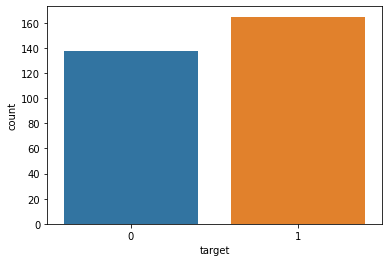

In [14]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [16]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

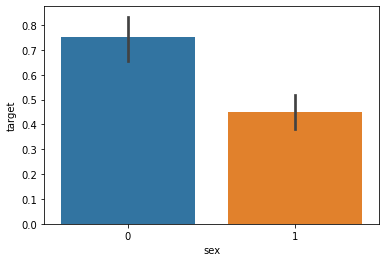

In [17]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

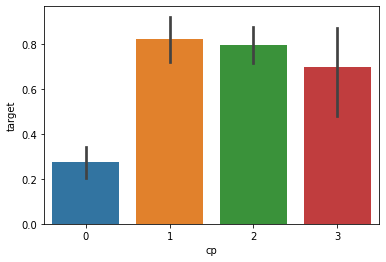

In [19]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='target'>

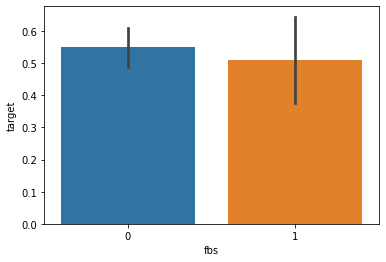

In [22]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [23]:
dataset["restecg"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='restecg', ylabel='target'>

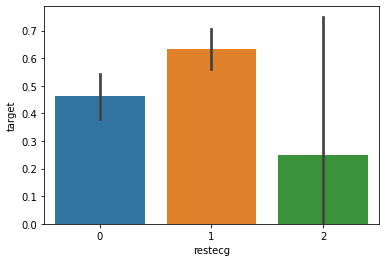

In [24]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [25]:
dataset["exang"].unique()

array([0, 1])

<AxesSubplot:xlabel='exang', ylabel='target'>

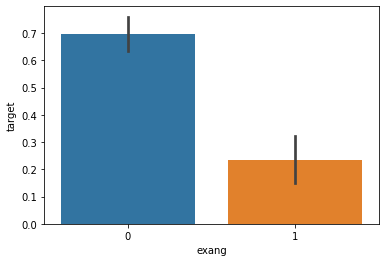

In [26]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [27]:
dataset["slope"].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='slope', ylabel='target'>

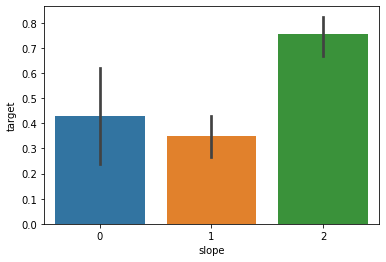

In [28]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [29]:
#number of major vessels (0-3) colored by flourosopy

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<AxesSubplot:xlabel='ca', ylabel='count'>

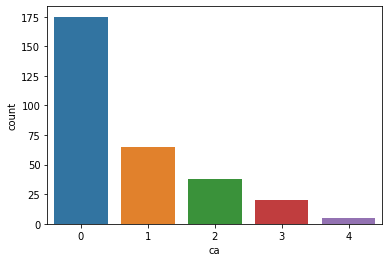

In [31]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

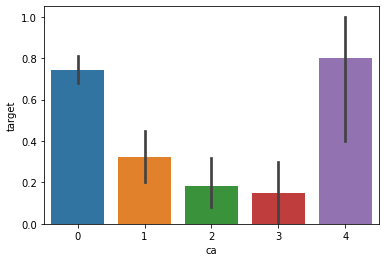

In [32]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [33]:
### Analysing the 'thal' feature

In [34]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='thal', ylabel='target'>

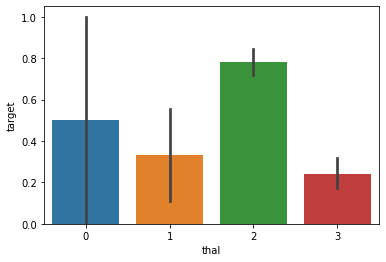

In [35]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

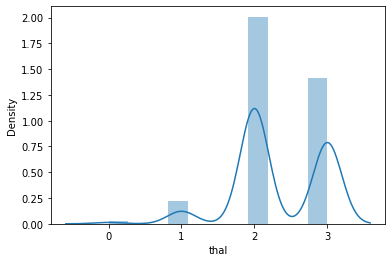

In [36]:
sns.distplot(dataset["thal"])

In [39]:
df=dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## IV. Train Test split 80 20

In [40]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [41]:
X_train.shape

(242, 13)

In [42]:
X_test.shape

(61, 13)

In [43]:
Y_train.shape

(242,)

In [44]:
Y_test.shape

(61,)

## V. Model Fitting

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)

In [90]:
Y_pred.shape

(31,)

Logistic Regression - 
Accuracy is: 87.1 %
F1 score is - 85.71
Precision is - 85.71
Recall is  - 85.71


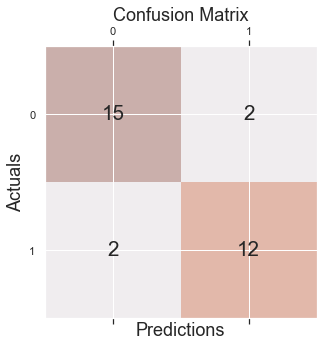

In [91]:
score_lr = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Logistic Regression - ")
print("Accuracy is: "+str(score_lr)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### Naive Bayes

Naive Bayes - 
Accuracy is: 80.65 %
F1 score is - 80.0
Precision is - 85.71
Recall is  - 75.0


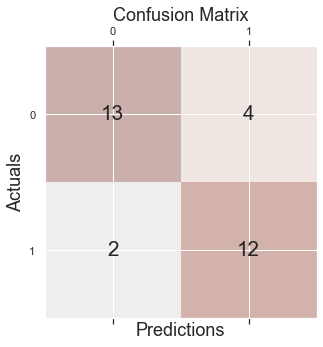

In [92]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Naive Bayes - ")
print("Accuracy is: "+str(score_nb)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### SVM

SVM - 
Accuracy is: 83.87 %
F1 score is - 82.76
Precision is - 85.71
Recall is  - 80.0


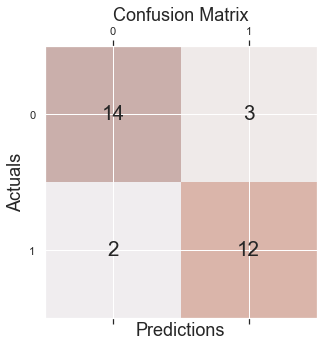

In [93]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("SVM - ")
print("Accuracy is: "+str(score_svm)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### K Nearest Neighbors

KNN - 
Accuracy is: 74.19 %
F1 score is - 73.33
Precision is - 78.57
Recall is  - 68.75


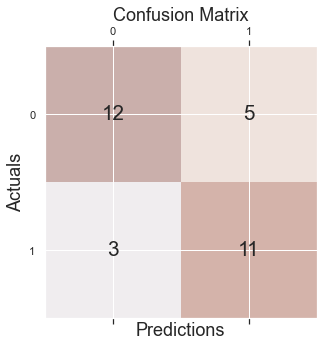

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("KNN - ")
print("Accuracy is: "+str(score_knn)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### Decision Tree

Desicion Tree - 
Accuracy is: 70.97 %
F1 score is - 68.97
Precision is - 71.43
Recall is  - 66.67


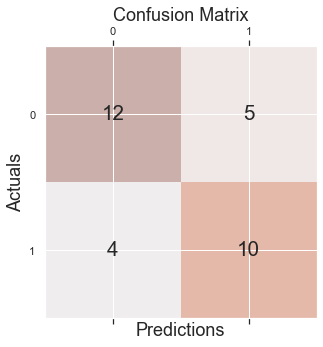

In [95]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("Desicion Tree - ")
print("Accuracy is: "+str(score_dt)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### Random Forest

Randon Forest - 
Accuracy is: 87.1 %
F1 score is - 85.71
Precision is - 85.71
Recall is  - 85.71


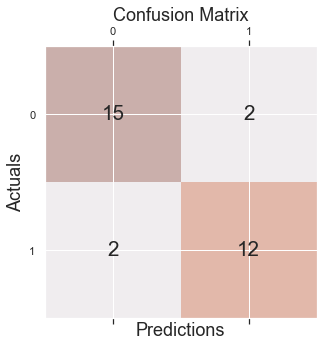

In [96]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Randon Forest - ")
print("Accuracy is: "+str(score_rf)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Randon Forest - 
Accuracy is: 87.1 %
F1 score is - 85.71
Precision is - 85.71
Recall is  - 85.71


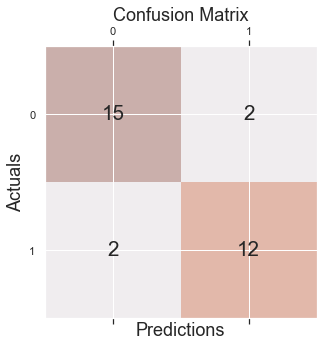

In [105]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Randon Forest - ")
print("Accuracy is: "+str(score_rf)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


## VI. Output final score

In [97]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 87.1 %
The accuracy score achieved using Naive Bayes is: 80.65 %
The accuracy score achieved using Support Vector Machine is: 83.87 %
The accuracy score achieved using K-Nearest Neighbors is: 74.19 %
The accuracy score achieved using Decision Tree is: 70.97 %
The accuracy score achieved using Random Forest is: 87.1 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

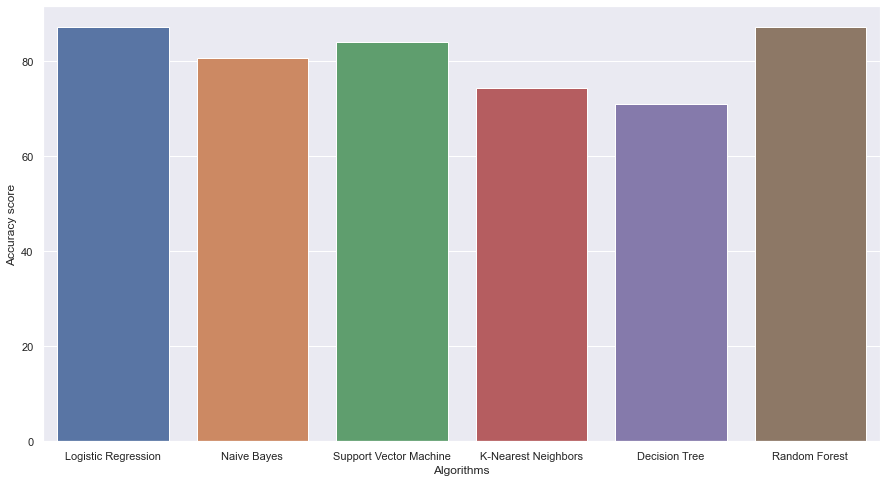

In [98]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [61]:
#test ratio 70:30

In [69]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Logistic Regression - 
Accuracy is: 87.1 %
F1 score is - 85.71
Precision is - 85.71
Recall is  - 85.71


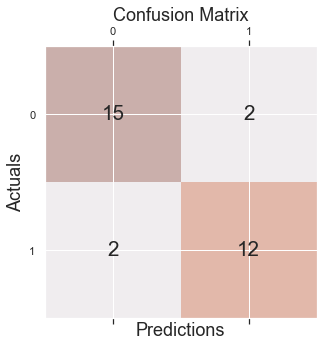

In [99]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Logistic Regression - ")
print("Accuracy is: "+str(score_lr)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Naive Bayes - 
Accuracy is: 80.65 %
F1 score is - 80.0
Precision is - 85.71
Recall is  - 75.0


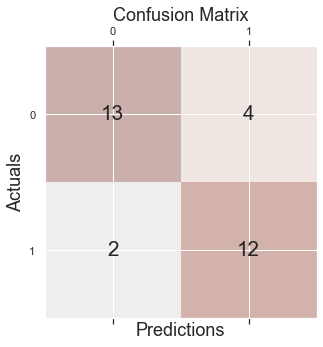

In [100]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("Naive Bayes - ")
print("Accuracy is: "+str(score_nb)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


SVM - 
Accuracy is: 83.87 %
F1 score is - 82.76
Precision is - 85.71
Recall is  - 80.0


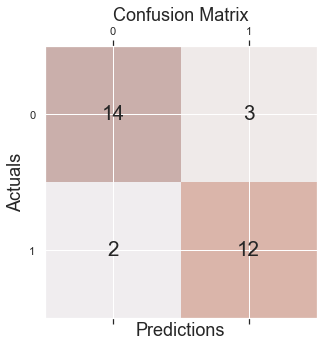

In [101]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("SVM - ")
print("Accuracy is: "+str(score_svm)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


KNN - 
Accuracy is: 74.19 %
F1 score is - 73.33
Precision is - 78.57
Recall is  - 68.75


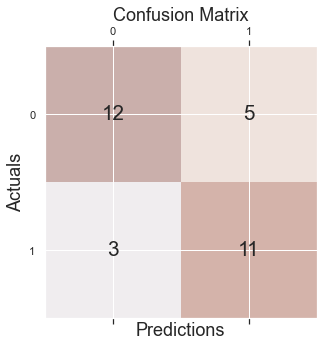

In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("KNN - ")
print("Accuracy is: "+str(score_knn)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Desicion Tree - 
Accuracy is: 70.97 %
F1 score is - 68.97
Precision is - 71.43
Recall is  - 66.67


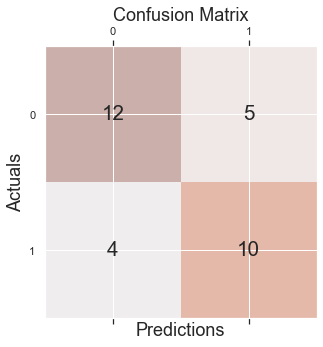

In [103]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("Desicion Tree - ")
print("Accuracy is: "+str(score_dt)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Randon Forest - 
Accuracy is: 87.1 %
F1 score is - 85.71
Precision is - 85.71
Recall is  - 85.71


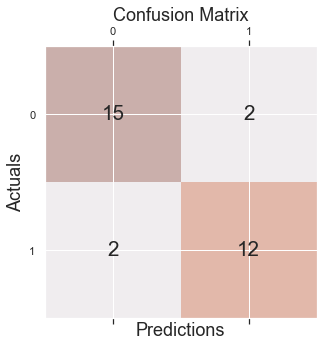

In [106]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("Randon Forest - ")
print("Accuracy is: "+str(score_rf)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [107]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    
print("Train:Test ratio is 70:30...")
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

Train:Test ratio is 70:30...
The accuracy score achieved using Logistic Regression is: 87.1 %
The accuracy score achieved using Naive Bayes is: 80.65 %
The accuracy score achieved using Support Vector Machine is: 83.87 %
The accuracy score achieved using K-Nearest Neighbors is: 74.19 %
The accuracy score achieved using Decision Tree is: 70.97 %
The accuracy score achieved using Random Forest is: 87.1 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

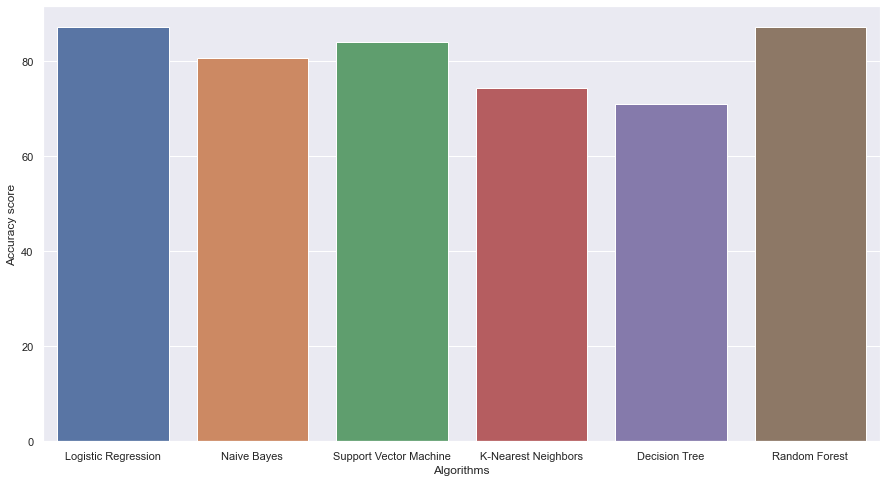

In [108]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [79]:
#90:10

In [80]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.10,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("Logistic Regression - ")
print("Accuracy is: "+str(score_lr)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred = nb.predict(X_test)

score_nb = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Naive Bayes - ")
print("Accuracy is: "+str(score_nb)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("SVM - ")
print("Accuracy is: "+str(score_svm)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)
print("KNN - ")
print("Accuracy is: "+str(score_knn)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
score_dt = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Desicion Tree - ")
print("Accuracy is: "+str(score_dt)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred,Y_test)*100,2)
p = round(precision_score(Y_pred,Y_test)*100,2)
r  = round(recall_score(Y_pred,Y_test)*100,2)
f = round(f1_score(Y_pred,Y_test)*100,2)

print("Randon Forest - ")
print("Accuracy is: "+str(score_rf)+" %")
print("F1 score is - "+str(f))
print("Precision is - "+str(p))
print("Recall is  - "+ str(r))


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    
print("Train:Test ratio is 90:10...")
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)